ДЗ 7. С использованием данных на страницах

https://стопкоронавирус.рф/information/

http://www.statdata.ru/largest_regions_russia

http://www.statdata.ru/ploshchad/rossii

Отобразите на графике:
1. Процент заболевших за последнюю неделю людей в зависимости от плотности населения для каждого региона. 
2. "Среднюю" вероятность заболеть (% в единицу времени, например, в неделю) для каждого региона на карте (России) и найдите самый безопасный по этому критерию регион.

#### Сбор и подготовка данных

##### Сбор данных с сайта стопкоронавирус.рф

1. Создаём датафрейм (df) с кодами и названиями регионов

In [1]:
import requests

r = requests.get('https://xn--80aesfpebagmfblc0a.xn--p1ai/information/')

import bs4
s = bs4.BeautifulSoup(r.content)
e = s.find('cv-spread-overview')

In [2]:
import json
jj = json.loads(e.attrs[':spread-data'])

In [3]:
data_1 = []

for x in jj:
    data_1.append({'code': x['code'], 'region': x['title']})

import pandas

df = pandas.DataFrame(data_1)

df

,code,region
0,RU-MOW,Москва
1,RU-SPE,Санкт-Петербург
2,RU-MOS,Московская область
3,RU-NIZ,Нижегородская область
4,RU-SVE,Свердловская область
...,...,...
80,RU-SEV,Севастополь
81,RU-MAG,Магаданская область
82,RU-YEV,Еврейская автономная область
83,RU-NEN,Ненецкий автономный округ


2. Создаём датафрем (df_0) с кодами регионов и с количеством заболевших за период с 31.12.20 по 07.01.21 (1 неделя)

In [4]:
s_1 = []
data_0 = []

for x in jj:
    r_1 = requests.get('https://стопкоронавирус.рф/covid_data.json?do=region_stats&code=' + x['code'])
    s_0 = bs4.BeautifulSoup(r_1.content).text
    s_1.append([x['code'], json.loads(s_0)])   
    
for item in s_1:
    for it in item[1]:
        if it["date"] == "07.01.2021":
            sick_after = int(it["sick"])    
        if it["date"] == "31.12.2020":
            sick_before = int(it["sick"])  
    data_0.append({'code': item[0], 'sick': sick_after - sick_before})
    
data_0
            
df_0 = pandas.DataFrame(data_0)

df_0
    

,code,sick
0,RU-MOW,33656
1,RU-SPE,24878
2,RU-MOS,9377
3,RU-NIZ,3242
4,RU-SVE,2775
...,...,...
80,RU-SEV,612
81,RU-MAG,242
82,RU-YEV,105
83,RU-NEN,21


3. Сохраняем этот датафрем (df_0) в csv-файл, чтобы не потерять данные, если они обновятся (видно, что json содержит не всю историю).

In [5]:
df_0.to_csv('C:/Users/vera.kosareva/output_corona.csv', encoding='utf-8')

4. Объединяем датафреймы df и df_0 в один

In [6]:
df_1 = df.merge(df_0, how = 'inner', left_on = 'code', right_on = 'code')

df_1

,code,region,sick
0,RU-MOW,Москва,33656
1,RU-SPE,Санкт-Петербург,24878
2,RU-MOS,Московская область,9377
3,RU-NIZ,Нижегородская область,3242
4,RU-SVE,Свердловская область,2775
...,...,...,...
80,RU-SEV,Севастополь,612
81,RU-MAG,Магаданская область,242
82,RU-YEV,Еврейская автономная область,105
83,RU-NEN,Ненецкий автономный округ,21


5. Создаём датафрем (df_2) с названиями регионов и их населением. Названия регионов, которые не совпадают с названиям в датафрейме df_1, заменяем на те, что содержит df_1.

In [7]:
from bs4 import BeautifulSoup

r = requests.get('http://www.statdata.ru/largest_regions_russia').text
soup = BeautifulSoup(r, 'html.parser')
soup.prettify()
all_tables = soup.find_all('table')
rows = []
data_2 = []

for i in all_tables[6].find_all('tr'):
    if i.find_all('td'):
        rows.append([j.text for j in i.find_all('td')[:2]])
        
for r in rows[4:]:
    if r[0] == 'Еврейская авт. область':
        r[0] = 'Еврейская автономная область'
    if r[0] == 'г. Москва':
        r[0] = 'Москва'
    if r[0] == 'г.Санкт-Петербург':
        r[0] = 'Санкт-Петербург'
    if r[0] == 'г. Севастополь':
        r[0] = 'Севастополь'
    if r[0] == 'Чувашская Республика':
        r[0] = 'Республика Чувашия'
    if r[0] == 'Тюменская область без АО':
        r[0] = 'Тюменская область'
    if r[0] == 'Респ. Сев. Осетия-Алания':
        r[0] = 'Республика Северная Осетия — Алания'
    if r[0] == 'Карачаево-Черкесская Респ.':
        r[0] = 'Карачаево-Черкесская Республика'
    if r[0] == 'Кабардино-Балкарская Респ.':
        r[0] = 'Кабардино-Балкарская Республика'
    if r[0] == 'Ханты-Мансийский АО-Югра':
        r[0] = 'Ханты-Мансийский АО'
    if r[0] == 'Челябинская область':
        r[0] = 'Челябинская область '
    data_2.append({'region': r[0], 'population': float(r[1].replace(' ', ''))})
    
df_2 = pandas.DataFrame(data_2)

df_2

,region,population
0,Белгородская область,1549151.0
1,Брянская область,1192491.0
2,Владимирская область,1358416.0
3,Воронежская область,2324205.0
4,Ивановская область,997135.0
...,...,...
89,Амурская область,790044.0
90,Магаданская область,140149.0
91,Сахалинская область,488257.0
92,Еврейская автономная область,158305.0


6. Создаём датафрем (df_3) с названиями и площадью регионов. Названия регионов, которые не совпадают с названиям в датафрейме df_1, заменяем на те, что содержит df_1.

In [8]:
r_square = requests.get('http://www.statdata.ru/ploshchad/rossii').text
soup = BeautifulSoup(r_square, 'html.parser')
soup.prettify()
all_tables_2 = soup.find_all('table')
rows_square = []
data_3 = []

for i in all_tables_2[6].find_all('tr'):
    if i.find_all('td'):
        rows_square.append([j.text for j in i.find_all('td')])
        
for rw in rows_square[2:]:
    if rw[1] == 'Еврейская авт. область':
        rw[1] = 'Еврейская автономная область'
    if rw[1] == 'г. Москва':
        rw[1] = 'Москва'
    if rw[1] == 'г.Санкт-Петербург':
        r[1] = 'Санкт-Петербург'
    if rw[1] == 'г. Севастополь':
        rw[1] = 'Севастополь'
    if rw[1] == 'Чувашская Республика':
        rw[1] = 'Республика Чувашия'
    if rw[1] == 'Респ. Сев. Осетия - Алания':
        rw[1] = 'Республика Северная Осетия — Алания'
    if rw[1] == 'Карачаево-Черкесия':
        rw[1] = 'Карачаево-Черкесская Республика'
    if rw[1] == 'Кабардино-Балкария':
        rw[1] = 'Кабардино-Балкарская Республика'
    if rw[1] == 'Тюменская обл. без АО':
        rw[1] = 'Тюменская область'
    if rw[1] == 'Челябинская область':
        rw[1] = 'Челябинская область '
    if rw[1] == 'Бурятия':
        rw[1] = 'Республика Бурятия'
    if rw[1] == 'Ханты-Мансийский ао-Югра':
        rw[1] = 'Ханты-Мансийский АО'
    if rw[1] == 'Архангельская обл. без НАО':
        rw[1] = 'Архангельская область'
    data_3.append({'region': rw[1], 'area_sq_km': float(rw[2].replace(' ', ''))})
    
df_3 = pandas.DataFrame(data_3)

df_3

,region,area_sq_km
0,Республика Саха (Якутия),3083523.0
1,Красноярский край,2366797.0
2,Тюменская обл. с АО,1464173.0
3,Хабаровский край,787633.0
4,Иркутская область,774846.0
...,...,...
82,Республика Адыгея,7792.0
83,Республика Ингушетия,3628.0
84,Москва,2561.0
85,Санкт-Петербург,1403.0


Задание 1. Отобразите на графике процент заболевших за последнюю неделю людей в зависимости от плотности населения для каждого региона. 

1. Объединяем df_2 и df_3, вычисляем плотность населения каждого региона (density) и сохраняем в датафрейм df_4

In [9]:
import pandasql

df_4 = pandasql.sqldf("""
SELECT df_2.region, df_2.population, population/area_sq_km AS density
FROM df_2 INNER JOIN df_3 ON df_3.region = df_2.region
""", locals())

df_4

,region,population,density
0,Белгородская область,1549151.0,57.092614
1,Брянская область,1192491.0,34.210948
2,Владимирская область,1358416.0,46.706643
3,Воронежская область,2324205.0,44.511357
4,Ивановская область,997135.0,46.514671
...,...,...,...
80,Амурская область,790044.0,2.182997
81,Магаданская область,140149.0,0.303048
82,Сахалинская область,488257.0,5.605642
83,Еврейская автономная область,158305.0,4.364506


2. Объединяем df_1 и df_4, вычисляем процент заболевших в каждом регионе (percent_sick) и сохраняем в датафрейм df_5

In [10]:
df_5 = pandasql.sqldf("""
SELECT df_4.region, df_4.density, sick/population*100 AS percent_sick
FROM df_1 INNER JOIN df_4 ON df_1.region = df_4.region
""", locals())

df_5

,region,density,percent_sick
0,Москва,4950.440843,0.265466
1,Санкт-Петербург,3847.515324,0.460869
2,Московская область,173.495071,0.121924
3,Нижегородская область,41.800820,0.101219
4,Свердловская область,22.184898,0.064375
...,...,...,...
80,Севастополь,519.835648,0.136261
81,Магаданская область,0.303048,0.172673
82,Еврейская автономная область,4.364506,0.066328
83,Ненецкий автономный округ,0.249482,0.047607


3. Строим график

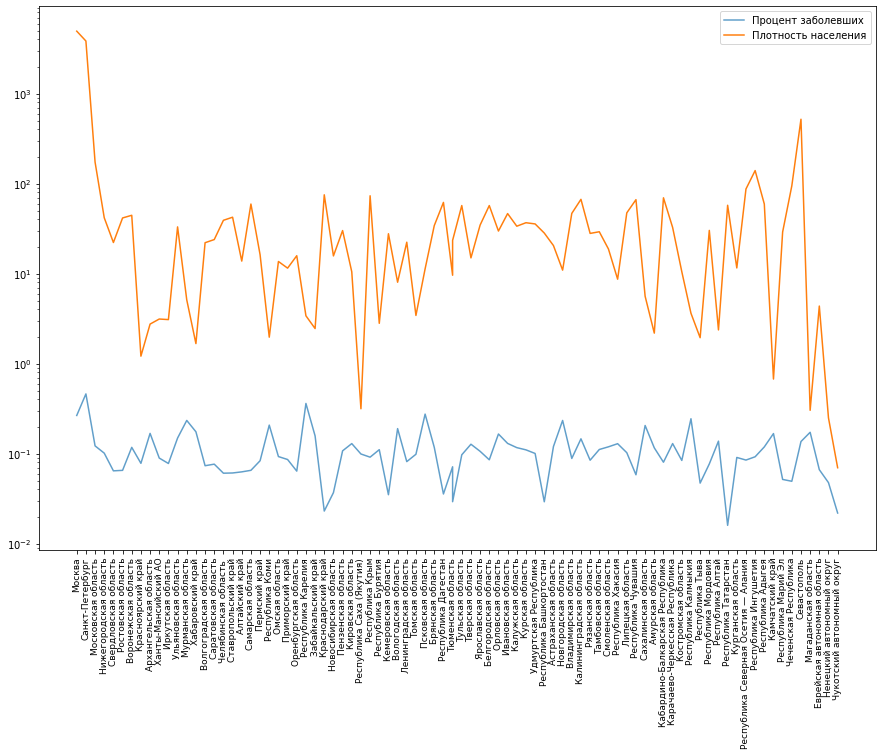

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(df_5.region, df_5.percent_sick, alpha=0.7, label='Процент заболевших')
plt.plot(df_5.region, df_5.density, label='Плотность населения')
plt.yscale('log')
plt.legend()
plt.xticks(rotation=90, fontsize=9)
plt.show()

Задание 2. Отобразите на графике "Среднюю" вероятность заболеть (% в единицу времени, например, в неделю) для каждого региона на карте (России) и найдите самый безопасный по этому критерию регион.

1. Объединяем df_1 и df_2 и вычисляем вероятность заболеть в каждом регионе (probability) за неделю - для этого количество заболевших за неделю (sick) делим на население региона (population).

In [12]:
df_6 = pandasql.sqldf("""
SELECT df_1.region, df_1.code, sick/population AS probability
FROM df_1 INNER JOIN df_2 ON df_1.region = df_2.region
ORDER BY probability asc
""", locals())

df_6

,region,code,probability
0,Республика Татарстан,RU-TT,0.000160
1,Чукотский автономный округ,RU-CHU,0.000219
2,Краснодарский край,RU-KDA,0.000230
3,Республика Башкортостан,RU-BA,0.000292
4,Тюменская область,RU-TYU,0.000292
...,...,...,...
80,Республика Калмыкия,RU-KL,0.002442
81,Москва,RU-MOW,0.002655
82,Псковская область,RU-PSK,0.002749
83,Республика Карелия,RU-KR,0.003610


2. Самый безопасный регион по вероятности заболеть - Республика Татарстан

3. Отображаем на карте России "Среднюю" вероятность заболеть для каждого региона

In [13]:
import geopandas as gpd
import fiona

In [14]:
fp = 'C:/Users/vera.kosareva/GeoJSON/admin_level_4.geojson'
map_df = gpd.read_file(fp)

map_df

,name,name:ru,boundary,admin_level,ref,int_ref,name:ca,name:de,name:en,name:es,...,alt_name:nl,name:sq,name:su,name:ug,name:tyv,official_name:bxr,name:aba,name:nog,alt_name:sl,geometry
0,Сумска,Сумска,administrative,4,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((35.39847 50.90907, 35.39812 50..."
1,Камчатский край,Камчатский край,administrative,4,RU-KAM,RU-KAM,Territori de Kamtxatka,Region Kamtschatka,Kamchatka Krai,Krai de Kamchatka,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((168.44560 54.51135, 168.44581 ..."
2,Мурманская область,Мурманская область,administrative,4,RU-MUR,RU-MUR,Província de Múrmansk,Oblast Murmansk,Murmansk Oblast,Óblast de Múrmansk,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((42.50570 66.99024, 42.31571 66..."
3,Пермский край,Пермский край,administrative,4,RU-PER,RU-PER,Territori de Perm,Region Perm,Perm Krai,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((59.48273 60.82788, 59.47942 60..."
4,Свердловская область,Свердловская область,administrative,4,RU-SVE,RU-SVE,Província de Sverdlovsk,Oblast Swerdlowsk,Sverdlovsk Oblast,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((66.18486 58.01097, 66.15487 58..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Красноярский край,Красноярский край,administrative,4,RU-KYA,RU-KYA,Territori de Krasnoiarsk,Region Krasnojarsk,Krasnoyarsk Krai,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((88.65810 55.29358, 88.65829 55..."
84,Бурятия,Бурятия,administrative,4,RU-BU,RU-BU,Buriàtia,Burjatien,Buryatia,Buriatia,...,None,None,None,None,None,Буряад Республика,None,None,None,"MULTIPOLYGON (((116.92138 54.79902, 116.92056 ..."
85,Иркутская область,Иркутская область,administrative,4,RU-IRK,RU-IRK,Província d'Irkutsk,Oblast Irkutsk,Irkutsk Oblast,Óblast de Irkutsk,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((119.13931 58.29523, 119.13842 ..."
86,Кабардино-Балкария,Кабардино-Балкария,administrative,4,RU-KB,RU-KB,Kabardino-Balkària,Kabardino-Balkarien,Kabardino-Balkaria,Kabardia-Balkaria,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((44.47537 43.58294, 44.44452 43..."


In [15]:
merged = map_df.set_index('ref').join(df_6.set_index('code'))

merged

,name,name:ru,boundary,admin_level,int_ref,name:ca,name:de,name:en,name:es,name:fr,...,name:su,name:ug,name:tyv,official_name:bxr,name:aba,name:nog,alt_name:sl,geometry,region,probability
RU-AD,Адыгея,Адыгея,administrative,4,RU-AD,Adiguèsia,Adygeja,Adygea,None,Adyguée,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((40.77672 44.46985, 40.77557 44...",Республика Адыгея,0.001188
RU-AL,Республика Алтай,Республика Алтай,administrative,4,RU-AL,República de l'Altai,Republik Altai,Altai Republic,República de Altái,République de l'Altaï,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((89.86565 50.47205, 89.86365 50...",NaN,NaN
RU-ALT,Алтайский край,Алтайский край,administrative,4,RU-ALT,Territori de l'Altai,Region Altai,Altai Krai,None,None,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((87.16734 52.70184, 87.16865 52...",Алтайский край,0.000627
RU-AMU,Амурская область,Амурская область,administrative,4,RU-AMU,Província de l'Amur,Oblast Amur,Amur Oblast,Óblast de Amur,Oblast d'Amour,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((134.92053 53.25866, 134.91971 ...",Амурская область,0.001159
RU-ARK,Архангельская область,Архангельская область,administrative,4,RU-ARK,Província d'Arkhànguelsk,Oblast Archangelsk,Arkhangelsk Oblast,None,None,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((37.97560 80.13514, 37.96434 80...",Архангельская область,0.001679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Сумска,Сумска,administrative,4,None,None,None,None,None,None,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((35.39847 50.90907, 35.39812 50...",NaN,NaN
NaN,Республика Крым,Республика Крым,administrative,4,None,República de Crimea,Republik Krim,Republic of Crimea,None,République de Crimée,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((36.68157 45.45661, 36.66350 45...",NaN,NaN
NaN,Севастополь,Севастополь,administrative,4,None,Sebastòpol,Sewastopol,Sevastopol,None,None,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((33.92620 44.42133, 33.92497 44...",NaN,NaN
NaN,Севастополь,Севастополь,administrative,4,None,Sebastòpol,Sewastopol,Sevastopol,Sebastopol,Sébastopol,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((33.92620 44.42133, 33.92497 44...",NaN,NaN


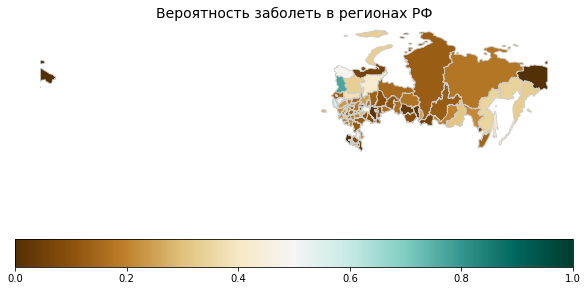

In [45]:
vmin, vmax = 0, 1
fig, ax = plt.subplots(1, figsize=(10, 10))

merged.plot(cmap='BrBG', column=variable, linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('Вероятность заболеть в регионах РФ', fontdict={'fontsize': '14', 'fontweight': '3'})

sm = plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal')
fig.savefig('map_export.png', dpi=300)